# **HW1: Regression** 
In *assignment 1*, you need to finish:

1.  Basic Part: Implement the regression model to predict the number of dengue cases


> *   Step 1: Split Data
> *   Step 2: Preprocess Data
> *   Step 3: Implement Regression
> *   Step 4: Make Prediction
> *   Step 5: Train Model and Generate Result

2.  Advanced Part: Implementing a regression model to predict the number of dengue cases in a different way than the basic part

# 1. Basic Part (60%)
In the first part, you need to implement the regression to predict the number of dengue cases

Please save the prediction result in a csv file **hw1_basic.csv**


## Import Packages

> Note: You **cannot** import any other package in the basic part

In [530]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random

## Global attributes
Define the global attributes

In [531]:
input_dataroot = 'hw1_basic_input.csv' # Input file named as 'hw1_basic_input.csv'
output_dataroot = 'hw1_basic.csv' # Output file will be named as 'hw1_basic.csv'

input_datalist =  [] # Initial datalist, saved as numpy array
output_datalist =  [] # Your prediction, should be 10 * 4 matrix and saved as numpy array
             # The format of each row should be ['epiweek', 'CityA', 'CityB', 'CityC']

You can add your own global attributes here


In [532]:
training_datalist = []
validation_datalist = []

prediction_datalist = []

## Load the Input File
First, load the basic input file **hw1_basic_input.csv**

Input data would be stored in *input_datalist*

In [533]:
# Read input csv to datalist
with open(input_dataroot, newline='') as csvfile:
  input_datalist = np.array(list(csv.reader(csvfile)))


In [534]:
df = pd.read_csv(input_dataroot)
#print(df.dtypes)


## Implement the Regression Model

> Note: It is recommended to use the functions we defined, you can also define your own functions


### Step 1: Split Data
Split data in *input_datalist* into training dataset and validation dataset 



In [ ]:
#training df[:84]
#validate = df[84:94]

In [535]:
#Fill in missing values NaN with median of each city
def PreprocessData():
    df['TemperatureA'] = df['TemperatureA'].replace(np.NaN, df["TemperatureA"].median())
    df['TemperatureB'] = df['TemperatureB'].replace(np.NaN, df["TemperatureB"].median())
    df['TemperatureC'] = df['TemperatureC'].replace(np.NaN, df["TemperatureC"].median())

    name = ['TemperatureA', 'TemperatureB', 'TemperatureC']
    #Replace Outlier with median of each city 
    for i in range(3):        
        df_sub = df[name[i]]
        iqr = df_sub.quantile(0.75)- df_sub.quantile(0.25)
        lim = np.abs((df_sub-df_sub.median())/ iqr) < 2.22
        df[name[i]] = df_sub.where(lim, df[name[i]].median())


In [536]:
# training_datalist = df[0:75]
# validation_datalist = df[75:94]
# prediction_datalist = df[94:105]

In [537]:
def SplitData():
  global training_datalist, validation_datalist, prediction_datalist
  training_datalist = df[0:75]
  validation_datalist = df[75:94]
  prediction_datalist = df[94:105]

In [538]:
PreprocessData()
SplitData()

In [539]:
# def PutInOutput(datalist):    
#     for i in datalist:
#         r = [i.epiweek, i.tempA, i.tempB, i.tempC, i.cityA, i.cityB, i.cityC]
#         output_datalist.append(r)


### Step 2: Preprocess Data
Handle the unreasonable data
> Hint: Outlier and missing data can be handled by removing the data or adding the values with the help of statistics  

In [542]:
# def PreprocessData():
#   return 0

### Step 3: Implement Regression
> Hint: You can use Matrix Inversion, or Gradient Descent to finish this part




In [544]:
# abc = np.arange(6)
# abc.reshape(3,2)
# print(type(abc))
# L = [1,3]
# L = np.array(L)
# print(type(L))
# L


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([1, 3])

In [546]:
dummy = np.ones((5,7))
type(dummy)

numpy.ndarray

In [547]:
training_datalist.loc[3:,"CityA"].to_numpy()

array([180, 162, 127, 108,  99,  94,  67,  78,  70,  90,  84,  83,  78,
        76,  80,  79,  97,  93,  60,  62,  62,  45,  55,  61,  50,  44,
        59,  44,  38,  44,  44,  46,  39,  29,  44,  32,  49,  40,  46,
        48,  37,  48,  59,  49,  66,  43,  53,  41,  37,  52,  31,  31,
        24,  22,  31,  35,  34,  26,  41,  44,  23,  26,  27,  32,  29,
        44,  37,  43,  51,  48,  59,  55], dtype=int64)

In [548]:
s = ["CityA", "CityB", "CityC"]
t = ["TemperatureA", "TemperatureB", "TemperatureC"]
print(training_datalist.loc[3, s[0]])
print(training_datalist.iloc[3, 4])


180
180


In [552]:
##REGRESSION
Pday_num = 3
Day_power = 3
#Matrix L = equation of multivariate polynomial regression 
L = np.zeros((75-Pday_num,Pday_num*Day_power+ Day_power +1))
for i in range(Pday_num, 75):
    #down the dataframe
    col = 0 
    for j in range(0,Pday_num):
        #to add into ea row of X
        for k in range(0, Day_power):
            #for power
            L[i-Pday_num,j*Day_power+k] = (math.pow(training_datalist.iloc[i-(j+1), 0], k+1))
            col = col+1

    for l in range(0, Day_power):
        L[i-Pday_num, Pday_num*Day_power + l] = math.pow(training_datalist.iloc[i, 0], l+1)
        #L[i-Pday_num, col] = math.pow(training_datalist.loc[i, t[0]], l+1)
        col = col+1
        
    L[i-Pday_num, Pday_num*Day_power + Day_power] = 1
#print(L)
# [pow(x,i) for i,x in enumerate(list)]
print(type(L))
L_tranpose = L.transpose()
#y = training_datalist.loc[:,"CityA"]
y = training_datalist.loc[Pday_num:,'CityA'].to_numpy()

print(type(y))

C = np.dot(L_tranpose, L)
C = np.linalg.inv(C)
C = np.dot(C,L_tranpose)
C = np.dot(C,y)

print(type(C))
print(C)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[-2.36088488e+03  2.58852749e-03  1.07287003e-08 -1.75696745e+03
  3.65281392e-03  2.29123420e-09 -1.95127371e+03  1.44846526e-03
  1.11494251e-08  2.41316401e+03  4.67257797e-04 -2.12380237e-08
  3.81502326e+08]


In [550]:
len(training_datalist)

75

In [553]:
##Make Prediction 
#Matrix L2 (1xPday_num*Day_power + Day_power + 1) such that c * L2 = y
L2 = np.zeros((Pday_num*Day_power+ Day_power +1))
print(type(L2))
print(L2.dtype)
#Container P
P = np.zeros((len(validation_datalist)+Pday_num, 3))
print(f"P type is {type(P)}")
#Fill in Pday
for i in range(Pday_num):
    for j in range(3):
        P[i][j] = training_datalist.loc[74-(Pday_num-i-1), s[j]]      
#print(P)
test = []
for i in range(Pday_num, len(validation_datalist)+Pday_num):  #fill in P container <- 
    #down the P container 
    # L2 = np.zeros(Pday_num*Day_power+ Day_power +1)
    for clr in range(len(L2)): L2[clr] = 0

    col = 0 
    for j in range(0,Pday_num):
        #to add into ea row of X
        for k in range(0, Day_power):
            #for power
            print(f"row = {i-(j+1)}")
            L2[j*Day_power + k] = (math.pow(P[i-(j+1), 0], k+1))
            col = col+1
  
    for l in range(0, Day_power):
        #take note that we still take temp from validation
        dmy1 = validation_datalist.iloc[i-Pday_num, 4]
        print(dmy1)
        L2[Pday_num*Day_power + l] = math.pow(validation_datalist.iloc[i-Pday_num, 4] , l+1)
        #L[i-Pday_num, col] = math.pow(training_datalist.loc[i, t[0]], l+1)
        col = col+1
        
    L2[Pday_num*Day_power + Day_power] = 1 
    test.append(L2)
    print(L2)

    #finish susbtituting value into equation, do C * L2 = y_hat
    y_hat = np.dot(L2, C)
    #0 here can be input parameter ** like cityA,
    P[i,0] = y_hat



<class 'numpy.ndarray'>
float64
P type is <class 'numpy.ndarray'>
row = 2
row = 2
row = 2
row = 1
row = 1
row = 1
row = 0
row = 0
row = 0
61
61
61
[5.50000e+01 3.02500e+03 1.66375e+05 5.90000e+01 3.48100e+03 2.05379e+05
 4.80000e+01 2.30400e+03 1.10592e+05 6.10000e+01 3.72100e+03 2.26981e+05
 1.00000e+00]
row = 3
row = 3
row = 3
row = 2
row = 2
row = 2
row = 1
row = 1
row = 1
57
57
57
[3.81322384e+08 1.45406761e+17 5.54468527e+25 5.50000000e+01
 3.02500000e+03 1.66375000e+05 5.90000000e+01 3.48100000e+03
 2.05379000e+05 5.70000000e+01 3.24900000e+03 1.85193000e+05
 1.00000000e+00]
row = 4
row = 4
row = 4
row = 3
row = 3
row = 3
row = 2
row = 2
row = 2
40
40
40
[5.95248156e+17 3.54320367e+35 2.10908545e+53 3.81322384e+08
 1.45406761e+17 5.54468527e+25 5.50000000e+01 3.02500000e+03
 1.66375000e+05 4.00000000e+01 1.60000000e+03 6.40000000e+04
 1.00000000e+00]
row = 5
row = 5
row = 5
row = 4
row = 4
row = 4
row = 3
row = 3
row = 3
51
51
51
[2.26277457e+045 5.12014877e+090 1.15857425e+136 5

OverflowError: math range error

In [ ]:
def Regression():
    #c = inverse((Xt*X))*Xt*y_predicted
    #create X
    # pday1, pday2, pday3 = 0
    # temp = 0

    # Pday1 = pday1**3 + pday1**2 + pday1**1  
    # Pday2 = pday2**3 + pday2**2 + pday2**1
    # Pday3 = pday3**3 + pday3**2 + pday3**1
    # Temp = temp**3 + temp**2 + temp**1
    # Beta = 1
    


### Step 4: Make Prediction
Make prediction of testing dataset and store the value in *output_datalist*

In [ ]:
y_predict = np.dot(L,C)

In [ ]:
def MakePrediction(): 
  return 0

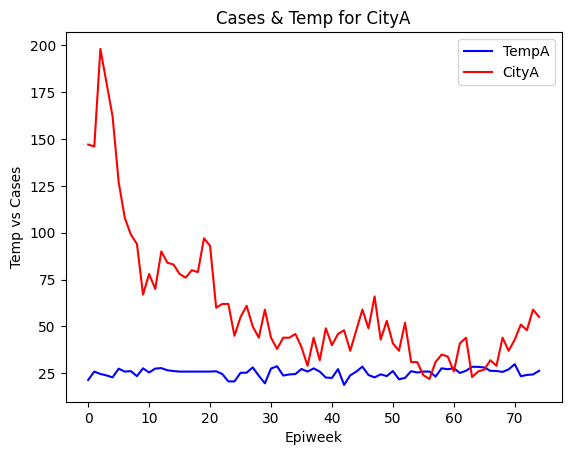

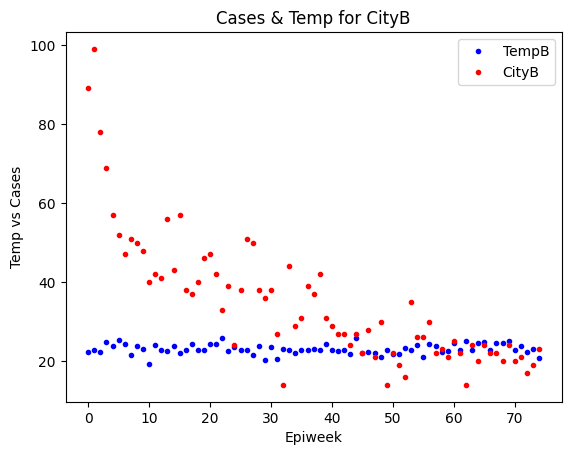

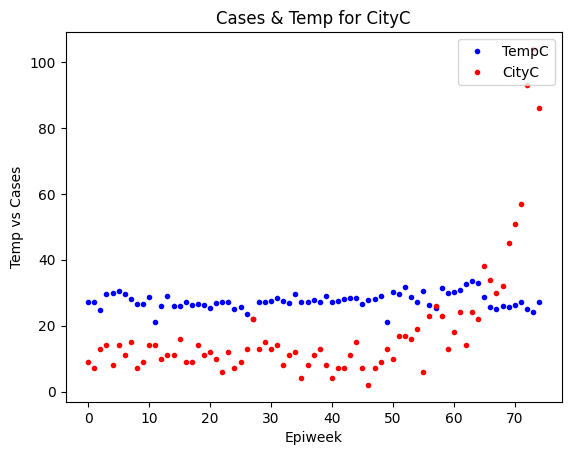

In [ ]:
#CityA
x = training_datalist.index
y1 = training_datalist['TemperatureA']
y2 = training_datalist['CityA']
plt.plot(x,y1,'-', color='blue', label='TempA')
plt.plot(x,y2,'-', color='red', label='CityA')

plt.title('Cases & Temp for CityA')
plt.xlabel('Epiweek')
plt.ylabel('Temp vs Cases')
plt.legend(loc='upper right')
plt.show()

#CityB
#x = training_datalist.index
y1 = training_datalist['TemperatureB']
y2 = training_datalist['CityB']
plt.plot(x,y1,'.', color='blue', label='TempB')
plt.plot(x,y2,'.', color='red', label='CityB')

plt.title('Cases & Temp for CityB')
plt.xlabel('Epiweek')
plt.ylabel('Temp vs Cases')
plt.legend(loc='upper right')
plt.show()

#CityC
#x = training_datalist.index
y1 = training_datalist['TemperatureC']
y2 = training_datalist['CityC']
plt.plot(x,y1,'.', color='blue', label='TempC')
plt.plot(x,y2,'.', color='red', label='CityC')

plt.title('Cases & Temp for CityC')
plt.xlabel('Epiweek')
plt.ylabel('Temp vs Cases')
plt.legend(loc='upper right')
plt.show()



In [ ]:
np.arange(5)


array([0, 1, 2, 3, 4])

In [ ]:
print(training_datalist.index)
type(y_predict)
np.array([1,8])

RangeIndex(start=0, stop=75, step=1)


array([1, 8])

In [ ]:
len(y_predict)
x2 = np.arange(Pday_num, Pday_num+len(y_predict))

print(x2)

[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74]


[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74]


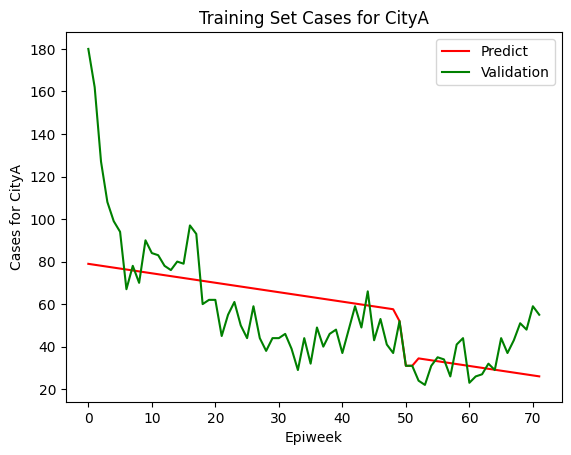

In [ ]:
#Validation Set

x1 = np.arange(len(y_predict))

print(x2)
y1 = y_predict
# y2 = training_datalist.iloc[3:75, 4]
y2 = training_datalist.iloc[Pday_num:len(training_datalist), 4]

plt.plot(x1,y1,'-', color='red', label='Predict')
# plt.plot(x1,y1,'.', color='blue', label='Predict')

plt.plot(x1,y2,'-', color='green', label='Validation')
# plt.plot(x1,y2,'.', color='red', label='Validation')


plt.title('Training Set Cases for CityA')
plt.xlabel('Epiweek')
plt.ylabel('Cases for CityA')
plt.legend(loc='upper right')
plt.show()


In [ ]:
y_predict[2]

78.04805624981236

In [ ]:
training_datalist.iloc[3, 4]

180

In [ ]:
#Generate MAPE
def Mape(Y_Actual, Y_Predicted):
    mape = np.mean(np.abs( (Y_Actual - Y_Predicted)/Y_Actual ))
    return mape

In [ ]:
def Calculate(Y_Actual, Y_Predicted):
    sum = 0
    for i in range(len(Y_Predicted)):
        #put in ea indvidual value
        # sum += Mape(training_datalist.iloc[Pday_num+i, 4], y_predict[i])
        # sum += Mape(Y_Actual.iloc[Pday_num+i, City_num], Y_Predicted[i])
        sum += Mape(Y_Actual[i], Y_Predicted[i])

    sum = (sum*100)/len(Y_Predicted)
    print(sum)

In [ ]:
Buffer1 = np.array(training_datalist.iloc[Pday_num:75, 4])
Calculate(Buffer1, y_predict)
# Calculate(training_datalist, y_predict, 4)
Buffer2 = np.array(validation_datalist.iloc[:, 4])
Buffer3 = P[Pday_num:,0]
# print(Buffer2.dtype)
# print(Buffer3.dtype)

# Calculate(Buffer2, np.arange(19))
result = Calculate(Buffer2, Buffer3)


30.10707119126202
211797.27021464295


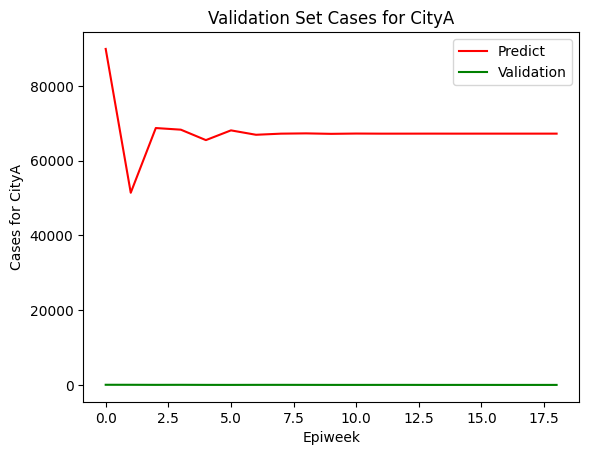

In [ ]:
#Validation Set

x1 = np.arange(len(Buffer3))

# y1 = y_predict
# # y2 = training_datalist.iloc[3:75, 4]
# y2 = training_datalist.iloc[Pday_num:len(training_datalist), 4]

plt.plot(x1,Buffer3,'-', color='red', label='Predict')
# plt.plot(x1,y1,'.', color='blue', label='Predict')

plt.plot(x1,Buffer2,'-', color='green', label='Validation')
# plt.plot(x1,y2,'.', color='red', label='Validation')


plt.title('Validation Set Cases for CityA')
plt.xlabel('Epiweek')
plt.ylabel('Cases for CityA')
plt.legend(loc='upper right')
plt.show()


In [ ]:
len(Buffer3)

19

### Step 5: Train Model and Generate Result

> Notice: **Remember to output the coefficients of the model here**, otherwise 5 points would be deducted
* If your regression model is *3x^2 + 2x^1 + 1*, your output would be: 
```
3 2 1
```





In [ ]:
print(C)

[-4.28236622e-01  9.26344544e-03  8.16133916e-02 -1.07285685e-01
  8.98989359e+04]


## Write the Output File
Write the prediction to output csv
> Format: 'epiweek', 'CityA', 'CityB', 'CityC'

In [556]:
type(C)
for i in C:
    print(i)

-2360.884883660823
0.0025885274889390075
1.0728700326474543e-08
-1756.9674536138773
0.0036528139163038986
2.2912341953200063e-09
-1951.2737051174045
0.0014484652602533288
1.1149425078220762e-08
2413.1640054509044
0.0004672577970268321
-2.1238023728066053e-08
381502326.42822266


In [558]:
with open(output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
  writer = csv.writer(csvfile)
  # for row in output_datalist:
  #   writer.writerow(row)
  
  writer.writerow(C)

# 2. Advanced Part (35%)
In the second part, you need to implement the regression in a different way than the basic part to help your predictions for the number of dengue cases

We provide you with two files **hw1_advanced_input1.csv** and **hw1_advanced_input2.csv** that can help you in this part

Please save the prediction result in a csv file **hw1_advanced.csv** 


# Report *(5%)*

Report should be submitted as a pdf file **hw1_report.pdf**

*   Briefly describe the difficulty you encountered 
*   Summarize your work and your reflections 
*   No more than one page






# Save the Code File
Please save your code and submit it as an ipynb file! (**hw1.ipynb**)